In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khushikyad001/impact-of-screen-time-on-mental-health")

print("Path to dataset files:", path)

Path to dataset files: /Users/justin_v_egmond/.cache/kagglehub/datasets/khushikyad001/impact-of-screen-time-on-mental-health/versions/1


In [2]:
import pandas as pd
import os

csv_path = os.path.join(path, "digital_diet_mental_health.csv") 
df = pd.read_csv(csv_path)

df.head(n=5)


,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


/Users/justin_v_egmond/miniconda3/envs/jupyterbook/bin/python3.10
Index(['user_id', 'age', 'gender', 'daily_screen_time_hours',
       'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours',
       'tv_usage_hours', 'social_media_hours', 'work_related_hours',
       'entertainment_hours', 'gaming_hours', 'sleep_duration_hours',
       'sleep_quality', 'mood_rating', 'stress_level',
       'physical_activity_hours_per_week', 'location_type',
       'mental_health_score', 'uses_wellness_apps', 'eats_healthy',
       'caffeine_intake_mg_per_day', 'weekly_anxiety_score',
       'weekly_depression_score', 'mindfulness_minutes_per_day'],
      dtype='object')


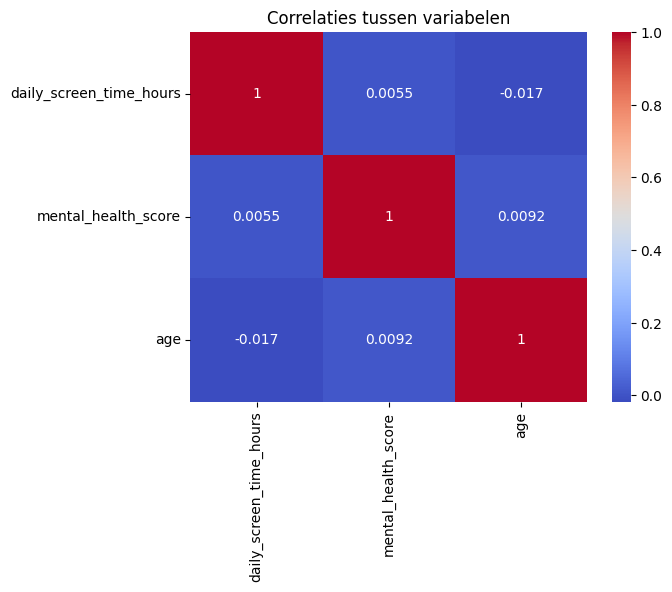

In [3]:
import sys
print(sys.executable)


# Kolomnamen controleren
print(df.columns)

# Verwijder rijen met missende of ongeldige data
df = df.dropna(subset=['daily_screen_time_hours', 'mental_health_score', 'age'])

# Filter op realistische waarden
df = df[(df['daily_screen_time_hours'] >= 0) & (df['daily_screen_time_hours'] <= 24)]
df = df[(df['age'] >= 10) & (df['age'] <= 100)]  # realistische leeftijden

import seaborn as sns
import matplotlib.pyplot as plt

# Correlatie
sns.heatmap(df[['daily_screen_time_hours', 'mental_health_score', 'age']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlaties tussen variabelen")
plt.show()


/var/folders/bf/gcjsn1cs1gdch6132wf_tnmh0000gn/T/ipykernel_11731/2084034661.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = df.groupby(['age_group', 'screen_time_cat'])['mental_health_score'].mean().unstack()


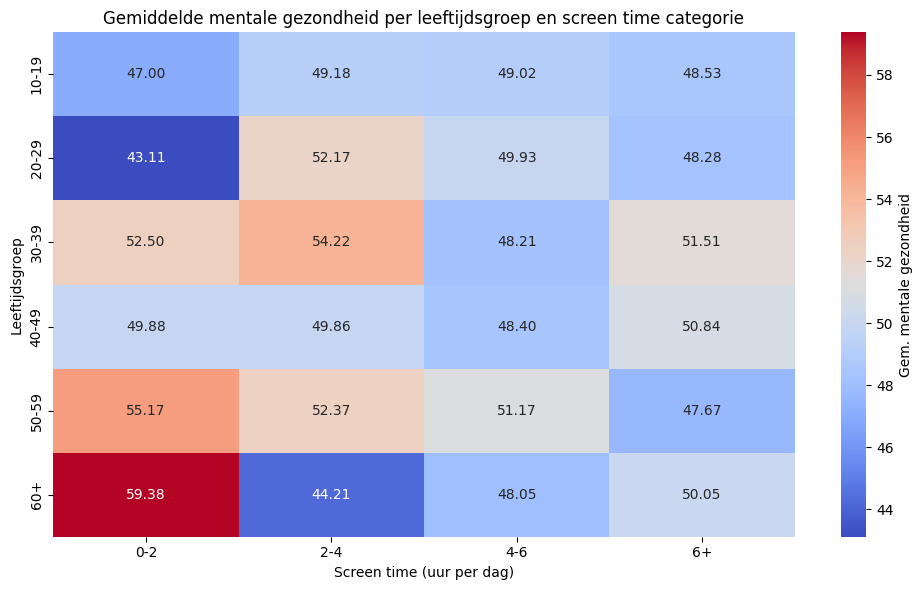

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Stel, je dataframe heet df en bevat kolommen: 'age', 'daily_screen_time_hours', 'mental_health_score'

# 1. Maak leeftijdsgroepen (bijv. 10-19, 20-29, etc.)
age_bins = [10, 19, 29, 39, 49, 59, 99]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

# 2. Maak screen time categorieën (bijv. 0-2, 2-4, 4-6, >6 uur)
screen_bins = [0, 2, 4, 6, df['daily_screen_time_hours'].max()]
screen_labels = ['0-2', '2-4', '4-6', '6+']
df['screen_time_cat'] = pd.cut(df['daily_screen_time_hours'], bins=screen_bins, labels=screen_labels, right=False)

# 3. Groepeer en bereken gemiddelde mentale gezondheid
pivot_table = df.groupby(['age_group', 'screen_time_cat'])['mental_health_score'].mean().unstack()

# 4. Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Gem. mentale gezondheid'})
plt.title('Gemiddelde mentale gezondheid per leeftijdsgroep en screen time categorie')
plt.xlabel('Screen time (uur per dag)')
plt.ylabel('Leeftijdsgroep')
plt.tight_layout()
plt.show()


/var/folders/bf/gcjsn1cs1gdch6132wf_tnmh0000gn/T/ipykernel_11731/1083730256.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_sm_table = df.groupby(['age_group', 'social_media_cat'])['stress_level'].mean().unstack()


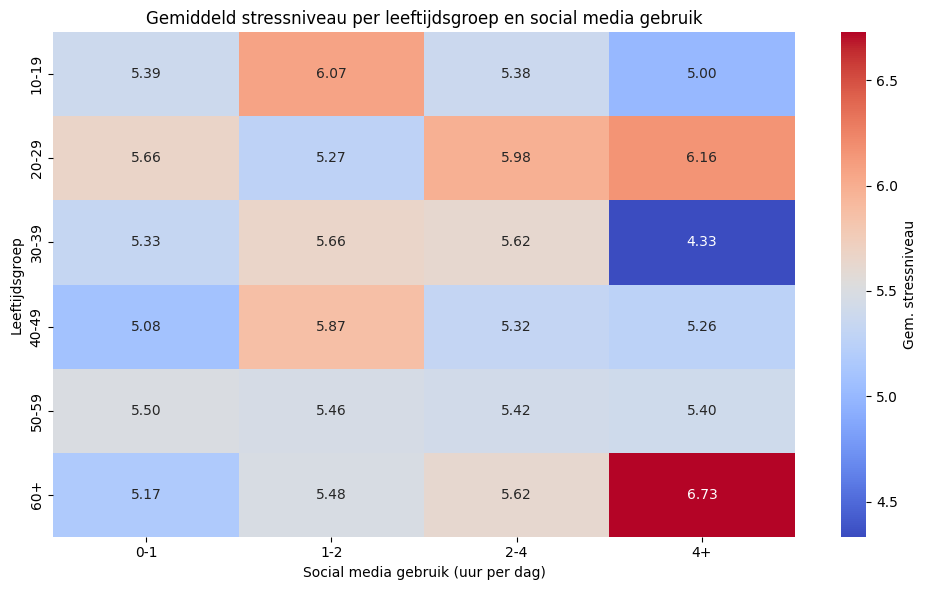

In [5]:
# Zorg dat age_group al aanwezig is (zoals eerder aangemaakt)
# Categoriseer social media gebruik
sm_bins = [0, 1, 2, 4, 6]
sm_labels = ['0-1', '1-2', '2-4', '4+']
df['social_media_cat'] = pd.cut(df['social_media_hours'], bins=sm_bins, labels=sm_labels, right=False)

# Groepeer: gemiddelde stress per combinatie van leeftijd en social media gebruik
stress_sm_table = df.groupby(['age_group', 'social_media_cat'])['stress_level'].mean().unstack()

# Visualiseer
plt.figure(figsize=(10, 6))
sns.heatmap(stress_sm_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Gem. stressniveau'})
plt.title('Gemiddeld stressniveau per leeftijdsgroep en social media gebruik')
plt.xlabel('Social media gebruik (uur per dag)')
plt.ylabel('Leeftijdsgroep')
plt.tight_layout()
plt.show()


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

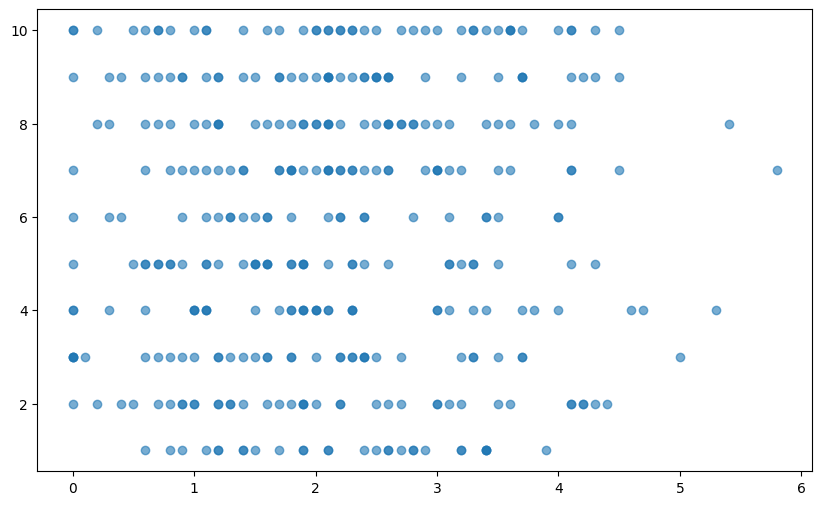

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter op leeftijdsgroep 20–29
df_20_29 = df[df['age_group'] == '20-29']

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_20_29,
    x='social_media_hours',
    y='stress_level',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    lowess=True  # Voor vloeiendere (niet-lineaire) trend
)

plt.title('Stressniveau versus socialmediagebruik (leeftijd 20-29)')
plt.xlabel('Social media gebruik (uren per dag)')
plt.ylabel('Stressniveau')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Douwe Maljers\AppData\Local\Temp\ipykernel_33372\1128037662.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_table = df.groupby(['age_group', 'screen_time_cat'])['stress_level'].mean().unstack()


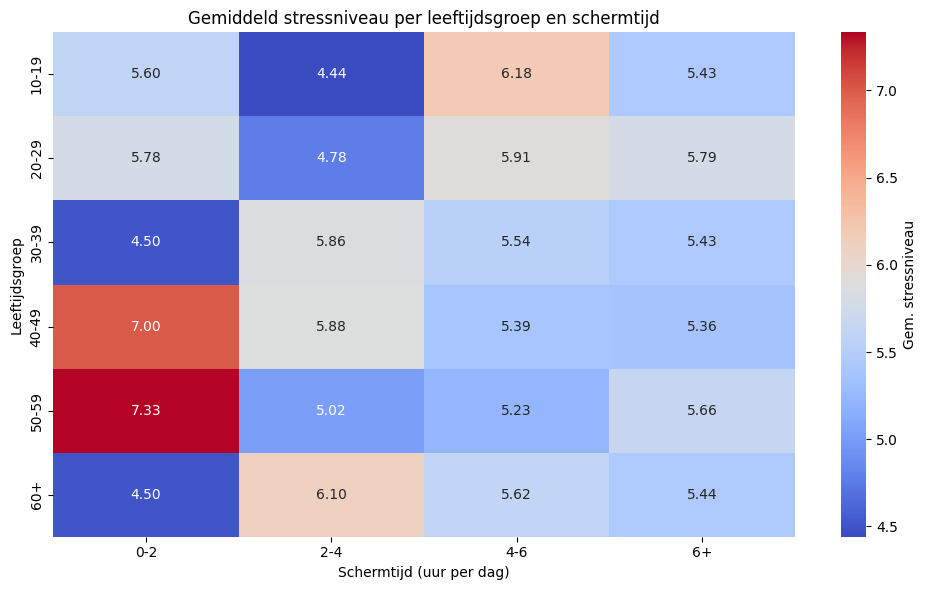

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bepaal schermtijdcategorieën
bins = [0, 2, 4, 6, 24]
labels = ['0-2', '2-4', '4-6', '6+']
df['screen_time_cat'] = pd.cut(df['daily_screen_time_hours'], bins=bins, labels=labels, right=False)

# Leeftijd categoriseren (zoals eerder)
age_bins = [10, 20, 30, 40, 50, 60, 100]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Gemiddelde stressniveau per combinatie van leeftijd en schermtijd
stress_table = df.groupby(['age_group', 'screen_time_cat'])['stress_level'].mean().unstack()

# Visualisatie
plt.figure(figsize=(10, 6))
sns.heatmap(stress_table, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Gem. stressniveau'})
plt.title('Gemiddeld stressniveau per leeftijdsgroep en schermtijd')
plt.xlabel('Schermtijd (uur per dag)')
plt.ylabel('Leeftijdsgroep')
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets, HBox, VBox, Layout, interactive_output
import pycountry

csv_path = "IHME_mental_real.csv"
df2 = pd.read_csv(csv_path)

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

df2["iso_alpha"] = df2["location"].apply(get_iso3)

# missing_iso = df2[df2["iso_alpha"].isna()]["location"].unique()
# print("Ontbrekende ISO3 codes:", missing_iso)

df2["val_display"] = df2.apply(lambda row: row["val"] * 100 if row["metric"] == "Percent" else row["val"], axis=1)

years = sorted(df2["year"].unique())
sexes = sorted(df2["sex"].unique())
metrics = sorted(df2["metric"].unique())

def plot_map(year, sex, metric):
    dff = df2[(df2["year"] == year) & (df2["sex"] == sex) & (df2["metric"] == metric)]
    if dff.empty:
        print("Geen data voor deze combinatie")
        return
    
    if metric == "Percent":
        color_range = [0, 20] # HARDCODE AANPASSEN
    else:
        color_range = [df2["val_display"].min(), df2["val_display"].max()]
    
    fig = px.choropleth(
        dff,
        locations="iso_alpha",
        color="val_display",
        hover_name="location",
        color_continuous_scale="Reds",
        range_color=color_range,
        labels={"val_display": f"Prevalentie ({metric})"},
        title=f"Mental disorders - {sex} - {metric} - {year}"
    )
    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
        width=900,
        height=600,
        margin={"r":0,"t":40,"l":0,"b":0}
    )
    fig.show()

year_slider = widgets.SelectionSlider(options=years, description="Jaar", continuous_update=False, layout=Layout(width='35%'))
sex_dropdown = widgets.Dropdown(options=sexes, description="Sekse", layout=Layout(width='150px'))
metric_dropdown = widgets.Dropdown(options=metrics, description="Metric", layout=Layout(width='150px'))

ui_top = HBox([sex_dropdown, metric_dropdown], layout=Layout(justify_content='flex-end', width='350px'))
ui = VBox([ui_top, year_slider])

out = widgets.Output()

def on_change(change):
    with out:
        out.clear_output(wait=True)
        plot_map(year_slider.value, sex_dropdown.value, metric_dropdown.value)

year_slider.observe(on_change, names='value')
sex_dropdown.observe(on_change, names='value')
metric_dropdown.observe(on_change, names='value')

display(ui, out)

with out:
    plot_map(years[0], sexes[0], metrics[0])


Output()

In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.4 MB/s eta 0:00:0000:01
